Feature spaces, Linear Algebra, Numeric data methods, Linear Regression
## Part 1

1. Feature space from csv file. Read `data/ds_salaries.csv` into a pandas dataframe

In [5]:
import pandas as pd

data = pd.read_csv('./my_data/ds_salaries.csv')

new_data = pd.DataFrame(data)

new_data

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


2. Prune the dataset to only have columns: "work_year", "experience_level", "salary_in_usd", "job_title", "company_location", "company_size".

In [12]:
new_dataframe = new_data[["work_year", "experience_level", "salary_in_usd", "job_title", "company_location", "company_size"]]
new_dataframe

,work_year,experience_level,salary_in_usd,job_title,company_location,company_size
0,2020,MI,79833,Data Scientist,DE,L
1,2020,SE,260000,Machine Learning Scientist,JP,S
2,2020,SE,109024,Big Data Engineer,GB,M
3,2020,MI,20000,Product Data Analyst,HN,S
4,2020,SE,150000,Machine Learning Engineer,US,L
...,...,...,...,...,...,...
602,2022,SE,154000,Data Engineer,US,M
603,2022,SE,126000,Data Engineer,US,M
604,2022,SE,129000,Data Analyst,US,M
605,2022,SE,150000,Data Analyst,US,M


3. Onehot encode "experience_level". Hint: look up pandas: `get_dummies()` method.

In [11]:
pd.get_dummies(new_dataframe.experience_level, prefix="col")

,col_EN,col_EX,col_MI,col_SE
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,0,0,1,0
4,0,0,0,1
...,...,...,...,...
602,0,0,0,1
603,0,0,0,1
604,0,0,0,1
605,0,0,0,1


4. labelencode "company_location" 

In [25]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


ex = data['company_location']= le.fit_transform(data['company_location'])

data['company_location']


0      12
1      29
2      18
3      20
4      48
       ..
602    48
603    48
604    48
605    48
606    48
Name: company_location, Length: 607, dtype: int64

5. Normalize the company_location number (relative value between 0-1) ![](https://cdn-images-1.medium.com/max/253/1*Dl3P3Rrzto258X0Ales9Xw.png)

In [18]:
bin = [0,75000,120000,250000,600000]
label = ['S','M','L','XL']
new_dataframe['binned_salary'] = pd.cut(new_dataframe['salary_in_usd'], bins=bin, labels=label)
#print(new_dataframe.head())
print(new_dataframe['binned_salary'])

0       M
1      XL
2       M
3       S
4       L
       ..
602     L
603     L
604     L
605     L
606     L
Name: binned_salary, Length: 607, dtype: category
Categories (4, object): ['S' < 'M' < 'L' < 'XL']


/tmp/ipykernel_57/379706055.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataframe['binned_salary'] = pd.cut(new_dataframe['salary_in_usd'], bins=bin, labels=label)


6. Make binning of the salary column (both cut and qcut methods).

In [19]:
quartiles = [0, .25, .5, .75, 1.]
new_dataframe['binned_salary_qcut'] = pd.qcut(new_dataframe['salary_in_usd'], q=quartiles)
print(new_dataframe['binned_salary_qcut'])

0       (62726.0, 101570.0]
1      (150000.0, 600000.0]
2      (101570.0, 150000.0]
3       (2858.999, 62726.0]
4      (101570.0, 150000.0]
               ...         
602    (150000.0, 600000.0]
603    (101570.0, 150000.0]
604    (101570.0, 150000.0]
605    (101570.0, 150000.0]
606    (150000.0, 600000.0]
Name: binned_salary_qcut, Length: 607, dtype: category
Categories (4, interval[float64, right]): [(2858.999, 62726.0] < (62726.0, 101570.0] < (101570.0, 150000.0] < (150000.0, 600000.0]]


/tmp/ipykernel_57/1945631118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataframe['binned_salary_qcut'] = pd.qcut(new_dataframe['salary_in_usd'], q=quartiles)


7. Make a barplot with binned salaries to show the company size count for each of the bins. Like this: 

<img src="images/binned_salaries.jpg" width=300/>

Hint: Use pandas Series unstack() method to get a dataframe from a multiindex Series object (The result of making a groupby count on both salary_bins and company_size columns

binned_salary
S     195
M     180
L     216
XL     16
Name: company_size, dtype: int64


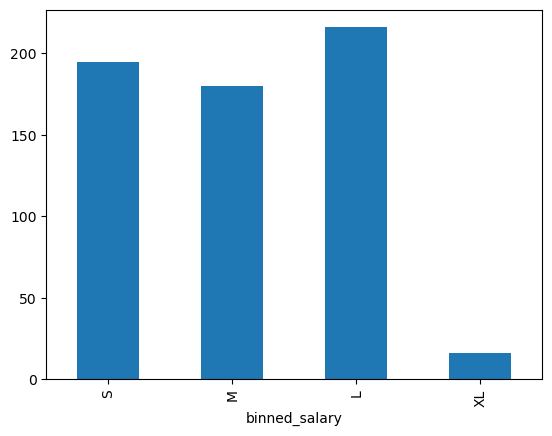

In [27]:
import matplotlib.pyplot as plt
company_size = new_dataframe.groupby(by=new_dataframe['binned_salary'])['company_size'].count()
print(company_size)
company_size.plot.bar()
plt.show()

## Part 2
8. Make it into a function that can take either company_size or experience_level as arguments.

9. Change the experience_level column to be numeric using this dictionary: `experience = {'EN':10,'EX':20,'MI':30,'SE':40}`. Hint: [Here](https://sparkbyexamples.com/pandas/pandas-remap-values-in-column-with-a-dictionary-dict/).


10. Use seaborn pairplot to see if there is an approximately linear relationship between experience_level and salary

11. scatter Plot the 2d feature space of 'experience_level' and 'salary_in_usd

12. Use sklearn to find the best possible linear relationship between experience_level and salary_in_usd using linear regression.

## Part 3: Linear Algebra
Given the below dictionarys find out where each of the 4 people find the cheapest shopping according to their needs.
```python
shoppers = {
'Paula':{'Is':4,'Juice':2,'Kakao':3,'Lagkager':2},
'Peter':{'Is':2,'Juice':5,'Kakao':0, 'Lagkager':4},
'Pandora':{'Is':5,'Juice':3, 'Kakao':4, 'Lagkager':5},
'Pietro':{'Is':1,'Juice':8, 'Kakao':9, 'Lagkager':1}
}
shop_prices = {
    'Netto': {'Is':10.50,'Juice':2.25,'Kakao':4.50,'Lagkager':33.50},
    'Fakta': {'Is':4.00,'Juice':4.50,'Kakao':6.25,'Lagkager':20.00}
}
```
Hint: you can use pandas and Transpose to create dataframe: `pd.DataFrame(shoppers).T` to get the necessary shape of the dataframe/matrix. Also use df.to_numpy() to changes a Pandas DataFrame df into a numpy ndarray with only the numeric data